<h1>Analyse de sentiments<h1>

* Nous faisons usage de l'analyseur de sentiments VADER qui évalue les émotions d'un texte et détermine si ce texte est positif, neutre ou négatif.

* Cet analyseur produit quatre différentes composantes de scores : positif, négatif, neutre et composé.

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from nltk.corpus import stopwords
import string
from textblob import Word
import pandas as pd


In [ ]:
nltk.download('vader_lexicon')
nltk.download("stopwords")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df = pd.read_csv("/content/avis_google_play_clean.csv")

In [ ]:
df.head()

,id,avis,clean_avis
0,com.tencent.ig,zephino cest ton téléphone qui bug,zephino phone bug
1,com.tencent.ig,j joue depuis 5 ans c'est bien cette jeux mais...,play year game not good luck
2,com.tencent.ig,j´adore pour lorsque j´ai du temp pour y joue ...,love tempt play thank amdim
3,com.tencent.ig,j'adore ce jeu battle Royale c'est comme fortn...,love battle royale game like fortnite good gam...
4,com.tencent.ig,beaucoup de bug quand plusieurs joueurs est da...,lot bug player build slowdown game


In [ ]:
# Instanciation de l'analyseur
analyser = SentimentIntensityAnalyzer()

In [ ]:
# Analyse des sentiments
def sentiment_analysis(df):
    analyser = SentimentIntensityAnalyzer()
    list_scores = []

    for i in df['clean_avis']:
        score = analyser.polarity_scores(i)
        list_scores.append(score)

    list_scores = pd.DataFrame(list_scores)

    def set_sentiment(x):
        if x > 0.05:
            return 'Positif'
        elif x < -0.05:
            return 'Négatif'
        else:
            return 'Neutre'

    list_scores['sentiment'] = list_scores['compound'].apply(lambda x: set_sentiment(x))
    return pd.concat([df, list_scores], axis=1)

# Application
df_final = sentiment_analysis(df)

In [ ]:
df_final.head()

,id,avis,clean_avis,neg,neu,pos,compound,sentiment
0,com.tencent.ig,zephino cest ton téléphone qui bug,zephino phone bug,0.000,1.000,0.000,0.0000,Neutre
1,com.tencent.ig,j joue depuis 5 ans c'est bien cette jeux mais...,play year game not good luck,0.475,0.292,0.233,-0.3582,Négatif
2,com.tencent.ig,j´adore pour lorsque j´ai du temp pour y joue ...,love tempt play thank amdim,0.000,0.180,0.820,0.8442,Positif
3,com.tencent.ig,j'adore ce jeu battle Royale c'est comme fortn...,love battle royale game like fortnite good gam...,0.042,0.261,0.696,0.9906,Positif
4,com.tencent.ig,beaucoup de bug quand plusieurs joueurs est da...,lot bug player build slowdown game,0.000,1.000,0.000,0.0000,Neutre


In [ ]:
df_final['id'] = df_final['id'].replace({
    'com.tencent.ig': 'PUBG',
    'com.gameloft.android.ANMP.GloftM5HM': 'MC5',
    'com.activision.callofduty.shooter': 'COD'
})


In [ ]:
df_final['id'].unique()

array(['PUBG', 'MC5', 'COD'], dtype=object)

In [ ]:
df_final.head()

,id,avis,clean_avis,neg,neu,pos,compound,sentiment
0,PUBG,zephino cest ton téléphone qui bug,zephino phone bug,0.000,1.000,0.000,0.0000,Neutre
1,PUBG,j joue depuis 5 ans c'est bien cette jeux mais...,play year game not good luck,0.475,0.292,0.233,-0.3582,Négatif
2,PUBG,j´adore pour lorsque j´ai du temp pour y joue ...,love tempt play thank amdim,0.000,0.180,0.820,0.8442,Positif
3,PUBG,j'adore ce jeu battle Royale c'est comme fortn...,love battle royale game like fortnite good gam...,0.042,0.261,0.696,0.9906,Positif
4,PUBG,beaucoup de bug quand plusieurs joueurs est da...,lot bug player build slowdown game,0.000,1.000,0.000,0.0000,Neutre


<h3>1 Visualisation et Interprétation des résultats<h3>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

<h4>1.1 Distribution des scores de sentiment<h4>

Pour mieux cerner la distribution des scores de sentiment des avis, nous générons des histogrammes. Ces histogrammes affichent la fréquence ou le nombre de scores de sentiment dans leurs catégories respectives (négatif, neutre, positif, composé).

<h4>1.1.1 PUBG<h4>

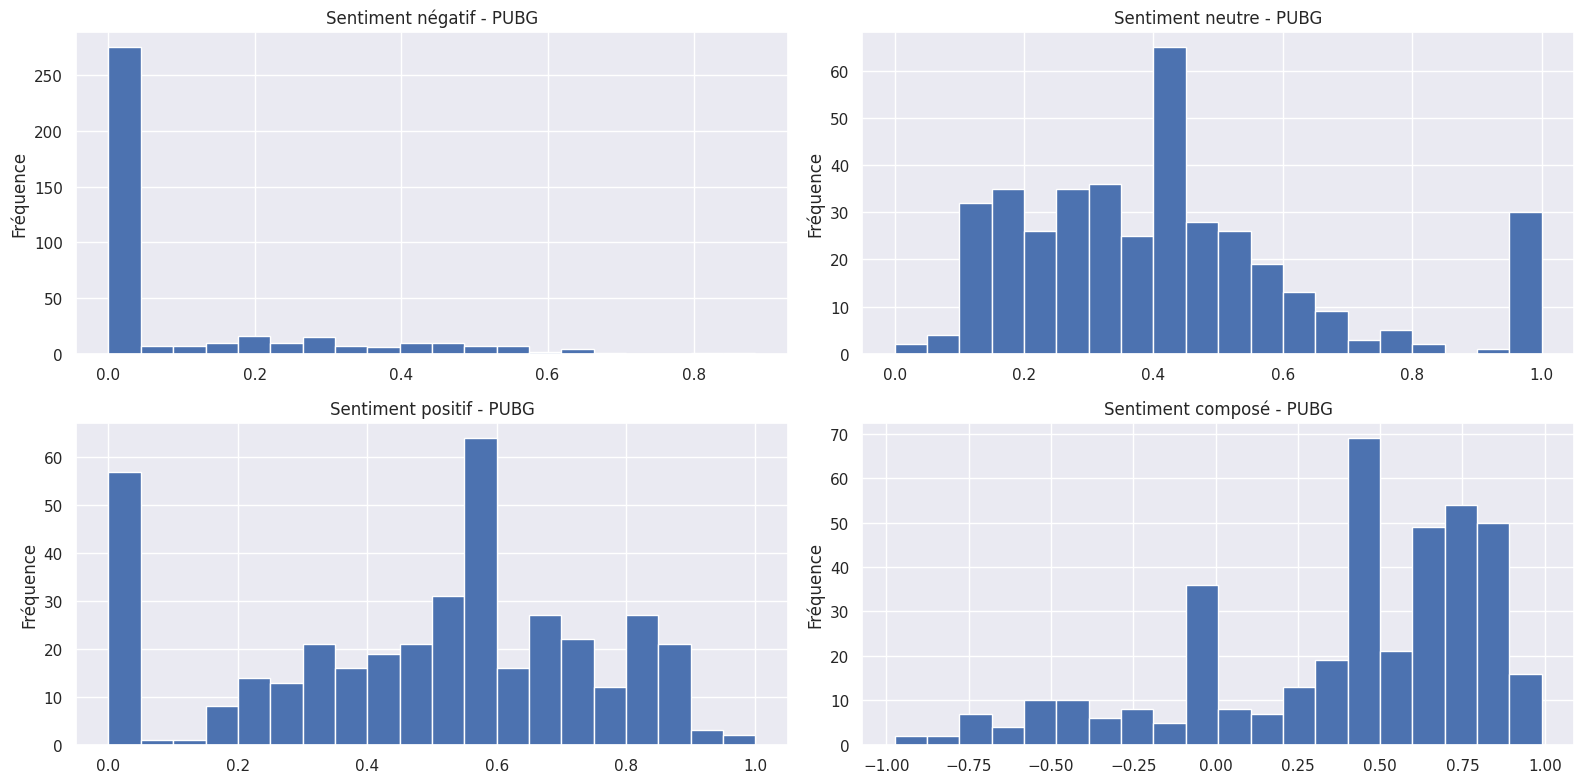

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))

df_final[df_final['id']=='PUBG']['neg'].plot(kind='hist', bins=20, ax=axes[0, 0], ylabel = 'Fréquence', title='Sentiment négatif - PUBG')
df_final[df_final['id']=='PUBG']['neu'].plot(kind='hist', bins=20, ax=axes[0, 1], ylabel = 'Fréquence', title='Sentiment neutre - PUBG')
df_final[df_final['id']=='PUBG']['pos'].plot(kind='hist', bins=20, ax=axes[1, 0], ylabel = 'Fréquence', title='Sentiment positif - PUBG')
df_final[df_final['id']=='PUBG']['compound'].plot(kind='hist', bins=20, ax=axes[1, 1], ylabel = 'Fréquence', title='Sentiment composé - PUBG')
plt.tight_layout()

plt.show()

<h4>1.1.2 MC5<h4>

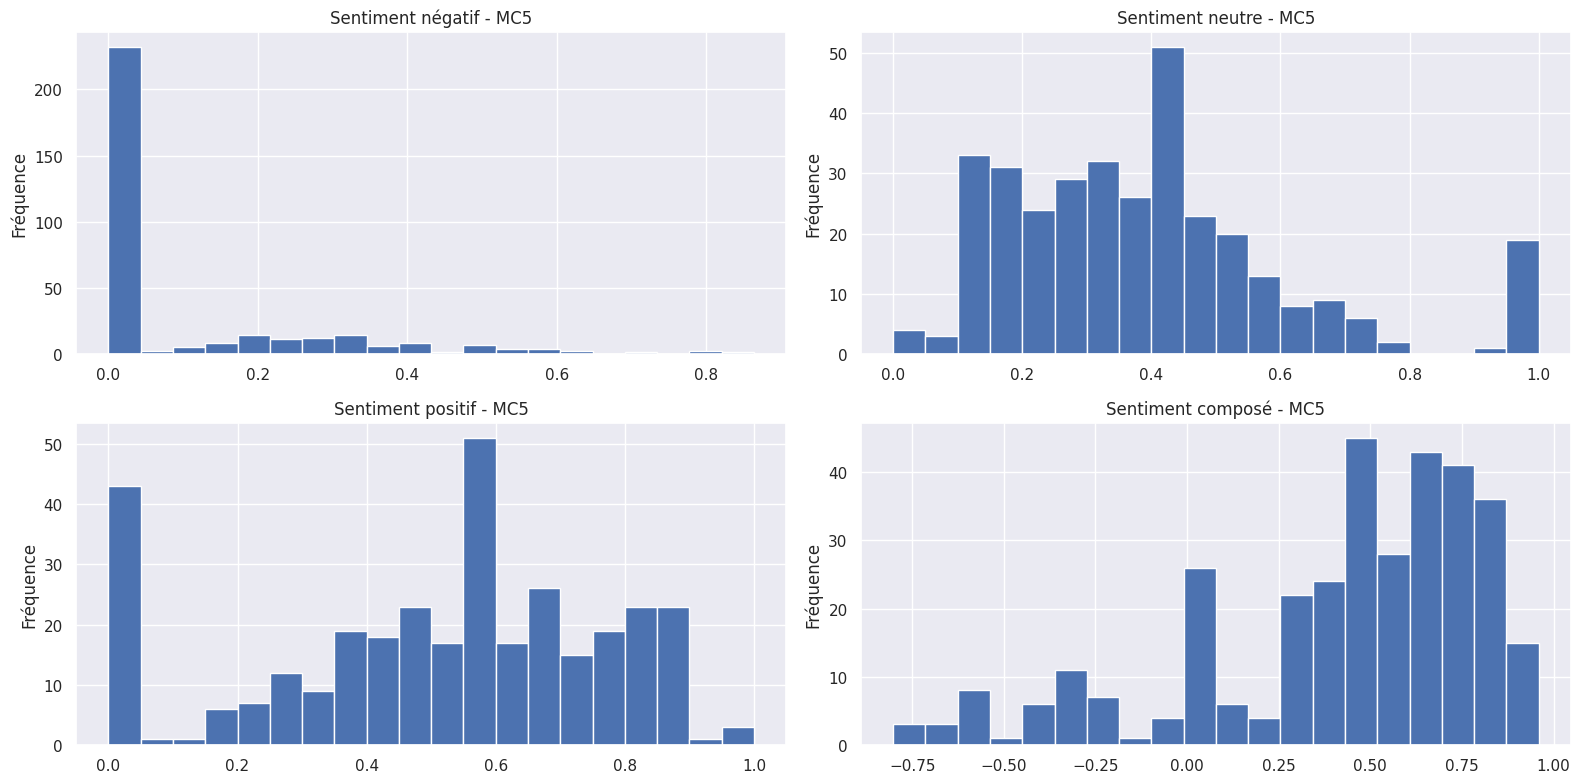

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))

df_final[df_final['id']=='MC5']['neg'].plot(kind='hist', bins=20, ax=axes[0, 0], ylabel = 'Fréquence', title='Sentiment négatif - MC5')
df_final[df_final['id']=='MC5']['neu'].plot(kind='hist', bins=20, ax=axes[0, 1], ylabel = 'Fréquence', title='Sentiment neutre - MC5')
df_final[df_final['id']=='MC5']['pos'].plot(kind='hist', bins=20, ax=axes[1, 0], ylabel = 'Fréquence', title='Sentiment positif - MC5')
df_final[df_final['id']=='MC5']['compound'].plot(kind='hist', bins=20, ax=axes[1, 1], ylabel = 'Fréquence', title='Sentiment composé - MC5')
plt.tight_layout()

plt.show()

<h4>1.1.3 COD<h4>

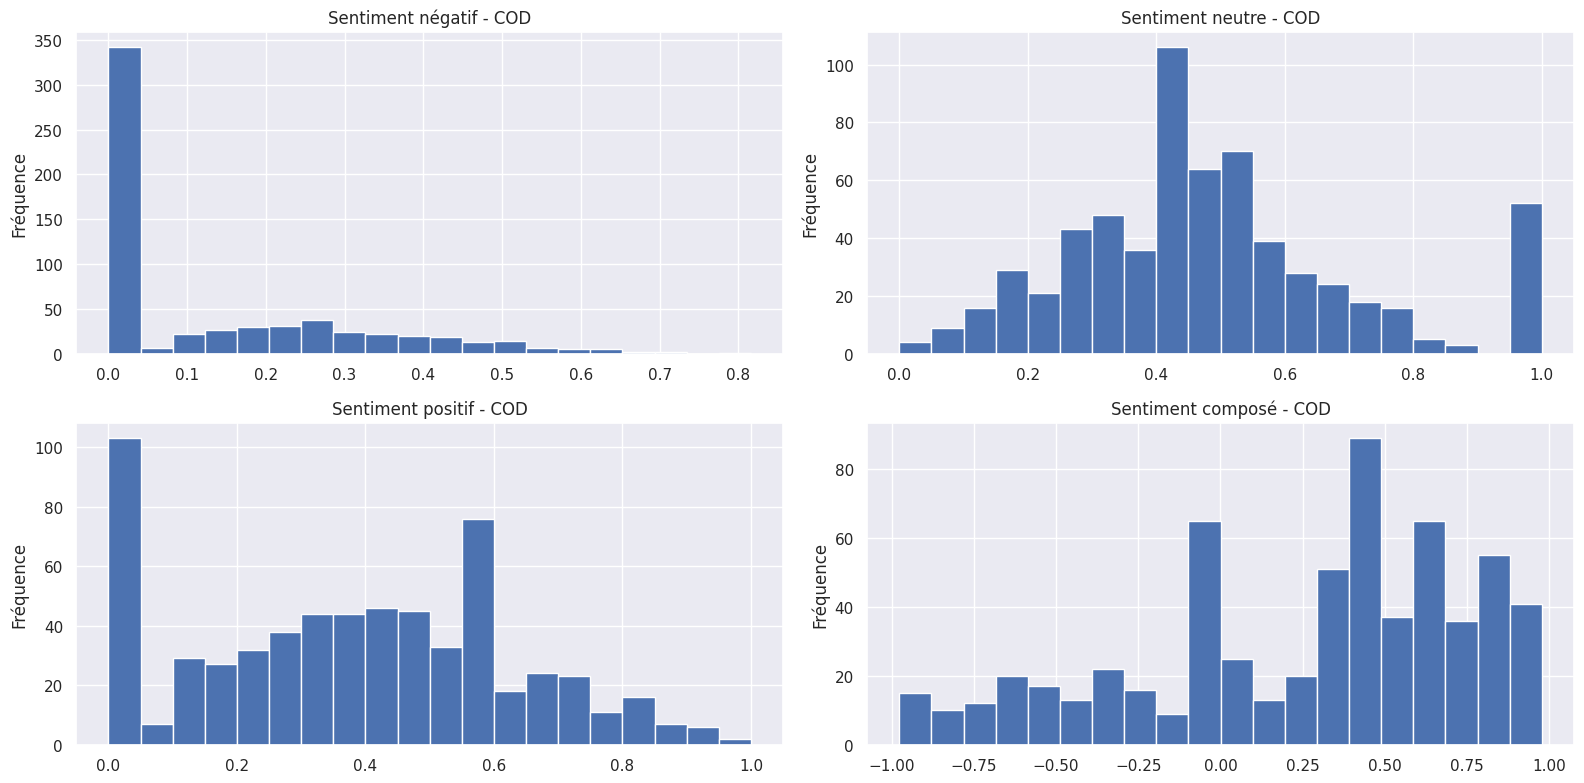

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))

df_final[df_final['id']=='COD']['neg'].plot(kind='hist', bins=20, ax=axes[0, 0], ylabel = 'Fréquence', title='Sentiment négatif - COD')
df_final[df_final['id']=='COD']['neu'].plot(kind='hist', bins=20, ax=axes[0, 1], ylabel = 'Fréquence', title='Sentiment neutre - COD')
df_final[df_final['id']=='COD']['pos'].plot(kind='hist', bins=20, ax=axes[1, 0], ylabel = 'Fréquence', title='Sentiment positif - COD')
df_final[df_final['id']=='COD']['compound'].plot(kind='hist', bins=20, ax=axes[1, 1], ylabel = 'Fréquence', title='Sentiment composé - COD')
plt.tight_layout()

plt.show()

Interprétation :
COD : Communauté nuancée, avec des commentaires allant de neutre à positif. Le jeu semble apprécié, mais avec des avis modérés.

PUBG : Les joueurs ont une opinion globalement bonne, plus claire que COD. Les commentaires sont moins neutres et plus positivement tranchés.

MC5 : C’est le jeu avec les retours les plus positifs. Très peu de négativité, et beaucoup de commentaires enthousiastes. Cela montre soit un jeu qui plaît énormément à sa niche, soit une communauté très fidèle et engagée.

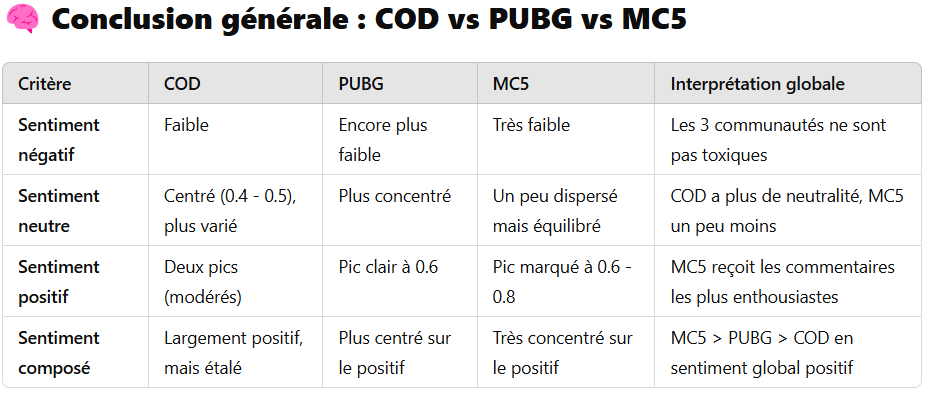

<h3> 1.2 Moyenne des scores composés <h3>

La moyenne est un indicateur pour apprécier de manière globale une population. Nous calculons le score composé moyen pour chaque jeu

In [ ]:
moy_comp = df_final.groupby('id')['compound'].mean().reset_index()
moy_comp.columns = ['Jeu', 'Score composé moyen']
moy_comp.set_index('Jeu', inplace=True)
moy_comp

,Score composé moyen
Jeu,
COD,0.259783
MC5,0.415280
PUBG,0.396011


Nous visualisons le score composé moyen par jeu à travers le graphe ci-dessous :

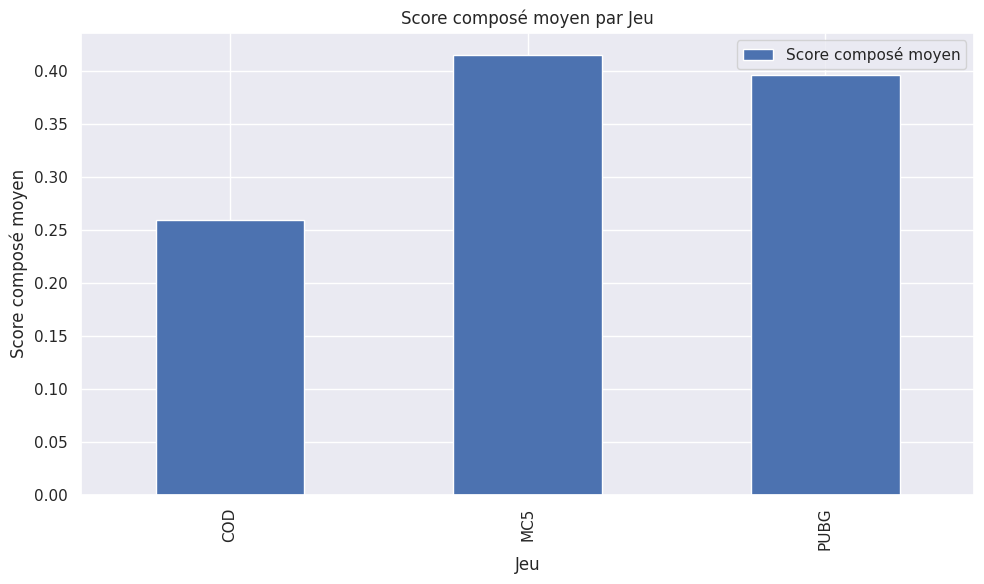

In [ ]:
moy_comp.plot(kind='bar', figsize=(10, 6), xlabel='Jeu', ylabel='Score composé moyen', title='Score composé moyen par Jeu')
plt.tight_layout()
plt.show()

<h5> Interprétation <h5>

Le score composé représente le sentiment général d'une phrase en normalisant les trois autres scores (négatif, neutre et positif) entre -1 et +1

Un score composé supérieur à 0 témoigne d'un sentiment globalement positif dans la phrase (1 étant la valeur extrême correspondant à un sentiment très positif)

Un score composé inférieur à 0 témoigne d'un sentiment globalement négatif dans la phrase (-1 étant la valeur extrême correspondant à un sentiment très négatif)

La moyenne des scores composés relativement à chaque application se trouve entre 0.2 et 0.4 comme nous le constatons à travers le tableau et le graphe ci-dessus. Ainsi les utilisateurs ont de manière générale une bonne appréciation de ces jeu meme si leur émotions est modérée

Nous pouvons confirmer ces assertions en calculant et en représentant la répartition des utilisateurs par type de sentiment et par jeu

<h3>1.3 Répartition des utilisateurs par type de sentiment et par jeu<h3>

Le tableau ci-dessous indique la répartition des utilisateurs par type de sentiment et par jeu

In [ ]:
stat = df_final.groupby('id')['sentiment'].value_counts()
stat = pd.DataFrame(stat)
stat.columns = ['Effectif']
stat

Effectif
id   sentiment          
COD  Positif         426
     Négatif         142
     Neutre           63
MC5  Positif         269
     Négatif          42
     Neutre           23
PUBG Positif         305
     Négatif          58
     Neutre           33

Nous visualisons la répartition précédente à travers les graphes ci-dessous

Le sentiment positif domine pour tous les jeux

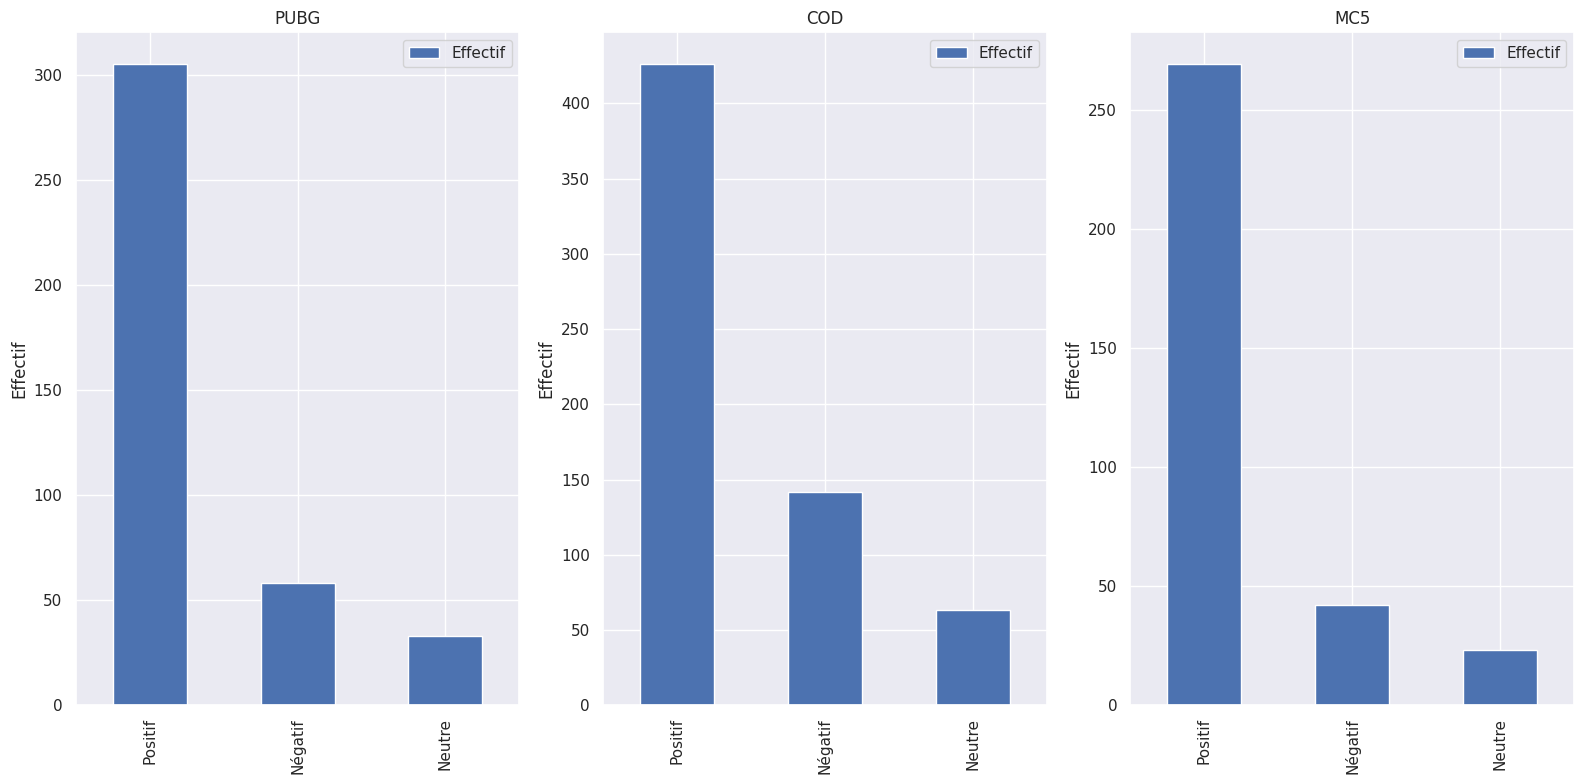

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 8))
stat.loc['PUBG'].plot(kind='bar', ax=axes[0], xlabel='', ylabel='Effectif', title='PUBG')
stat.loc['COD'].plot(kind='bar', ax=axes[1], xlabel='', ylabel='Effectif', title='COD')
stat.loc['MC5'].plot(kind='bar', ax=axes[2], xlabel='', ylabel='Effectif', title='MC5')
plt.tight_layout()

plt.show()

<h3>1.4 Identification des mots positifs fréquemment utilisés dans les avis<h3>

Pour identifier les mots les plus fréquemment utilisés dans les commentaires, nous adoptons la démarche suivante :

* Calcul de la fréquence de chaque mot dans l'ensemble des commentaires

* Tri des mots par ordre décroissant de leur fréquence d'apparition

* Filtrage des mots en retenant ceux dont la fréquence est supérieure à un certain seuil

* Visualisation des termes les plus significatifs

<h4>1.4.1 PUBG<h4>

In [ ]:
# Isolation des données de PUBG
df_PUBG = df_final[df_final['id']=='PUBG']

In [ ]:
# Calcul de la fréquence de mots

word_freq_PUBG = df_PUBG['clean_avis'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
word_freq_PUBG.columns = ['Mots', 'Fréquence']
word_freq_PUBG = word_freq_PUBG.sort_values(by='Fréquence', ascending=False)

word_freq_PUBG.head(10)

<ipython-input-96-b0e622f545cd>:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  word_freq_PUBG = df_PUBG['clean_avis'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
<ipython-input-96-b0e622f545cd>:3: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  word_freq_PUBG = df_PUBG['clean_avis'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
<ipython-input-96-b0e622f545cd>:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  word_freq_PUBG = df_PUBG['clean_avis'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
<ipython-input-96-b0e622f545cd>:3: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.

,Mots,Fréquence
5,game,344.0
7,good,166.0
3,play,85.0
19,like,49.0
51,mobile,42.0
117,world,42.0
9,love,31.0
11,thank,28.0
4,year,28.0
35,well,27.0


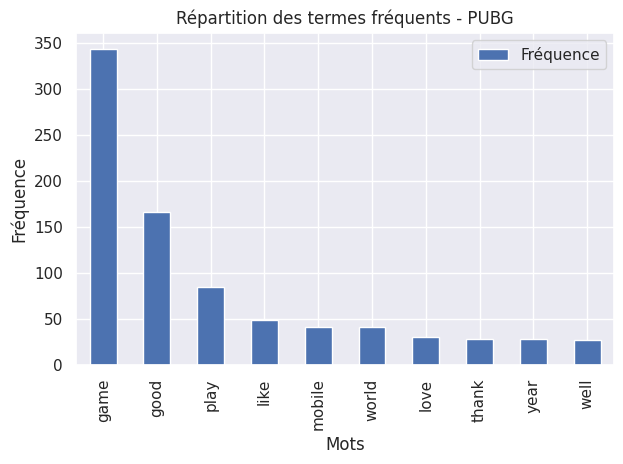

In [ ]:
# Visualisation de la répartition des termes fréquents à propos de PUBG
word_freq_PUBG[word_freq_PUBG['Fréquence'] > 26].plot.bar(x='Mots', y='Fréquence', ylabel='Fréquence', title='Répartition des termes fréquents - PUBG')
plt.tight_layout()
plt.show()

<h4>1.4.2 COD<h4>

In [ ]:
# Isolation des données de COD
df_COD = df_final[df_final['id']=='COD']

# Calcul de la fréquence de mots
word_freq_COD = df_COD['clean_avis'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
word_freq_COD.columns = ['Mots', 'Fréquence']
word_freq_COD = word_freq_COD.sort_values(by='Fréquence', ascending=False)

word_freq_COD.head(10)

<ipython-input-98-7e1c5efd3d04>:5: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  word_freq_COD = df_COD['clean_avis'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
<ipython-input-98-7e1c5efd3d04>:5: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  word_freq_COD = df_COD['clean_avis'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
<ipython-input-98-7e1c5efd3d04>:5: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  word_freq_COD = df_COD['clean_avis'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
<ipython-input-98-7e1c5efd3d04>:5: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarra

,Mots,Fréquence
7,game,579.0
8,good,237.0
11,play,149.0
36,mobile,71.0
143,update,66.0
183,like,60.0
164,player,54.0
39,weapon,54.0
141,time,54.0
247,problem,47.0


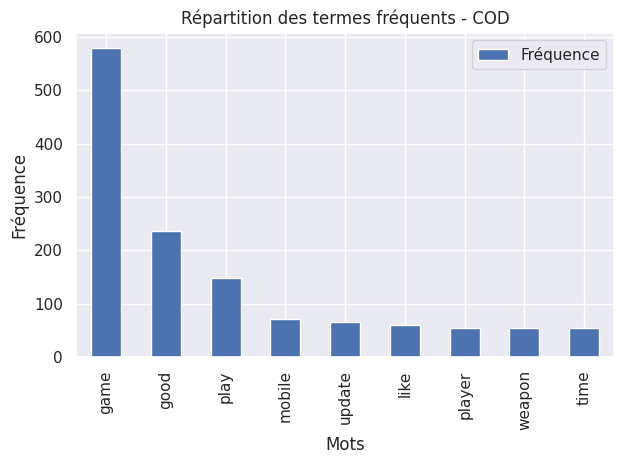

In [ ]:
# Visualisation de la répartition des termes fréquents à propos de COD
word_freq_COD[word_freq_COD['Fréquence'] > 50].plot.bar(x='Mots', y='Fréquence', ylabel='Fréquence', title='Répartition des termes fréquents - COD')
plt.tight_layout()
plt.show()

<h4>1.4.3 MC5<h4>

In [ ]:
# Isolation des données de MC5
df_MC5 = df_final[df_final['id']=='MC5']

# Calcul de la fréquence de mots
word_freq_MC5 = df_MC5['clean_avis'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
word_freq_MC5.columns = ['Mots', 'Fréquence']
word_freq_MC5 = word_freq_MC5.sort_values(by='Fréquence', ascending=False)

word_freq_MC5.head(10)

<ipython-input-100-614469dcd906>:5: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  word_freq_MC5 = df_MC5['clean_avis'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
<ipython-input-100-614469dcd906>:5: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  word_freq_MC5 = df_MC5['clean_avis'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
<ipython-input-100-614469dcd906>:5: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  word_freq_MC5 = df_MC5['clean_avis'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
<ipython-input-100-614469dcd906>:5: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.nd

,Mots,Fréquence
0,game,298.0
7,good,111.0
87,play,51.0
13,great,43.0
1,like,41.0
113,cool,36.0
17,graphic,33.0
157,love,26.0
40,beautiful,21.0
203,connection,18.0


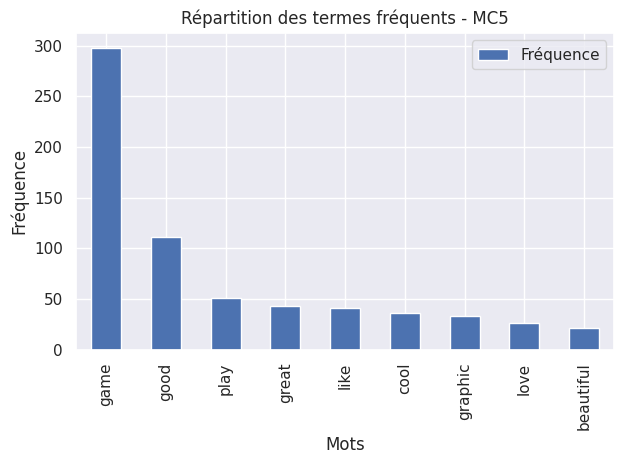

In [ ]:
# Visualisation de la répartition des termes fréquents à propos de MC5
word_freq_MC5[word_freq_MC5['Fréquence'] > 20].plot.bar(x='Mots', y='Fréquence', ylabel='Fréquence', title='Répartition des termes fréquents - MC5')
plt.tight_layout()
plt.show()

<h3>1.5 Nuage des mots positifs dans les avis<h3>

* Dans cette section, nous créons et visualisons un nuage de mots en utilisant l'ensemble des commentaires

* Le but est d'afficher les mots fréquents dans un format visuel adapté, montrant clairement leur importance et leur prévalence dans les commentaires.

* Cela permettra une observation rapide des tendances clés et des caractéristiques importantes des avis des utilisateurs

In [ ]:
from wordcloud import WordCloud
import seaborn as sns
sns.reset_orig()

<h4> 1.5.1 PUBG <h4>

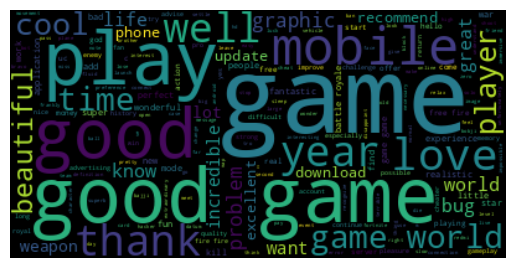

In [ ]:
text = " ".join(i for i in df_PUBG.clean_avis)
nuage = WordCloud().generate(text)
plt.imshow(nuage, interpolation="bilinear")
plt.axis("off")
plt.show()

<h4> 1.5.2 COD <h4>

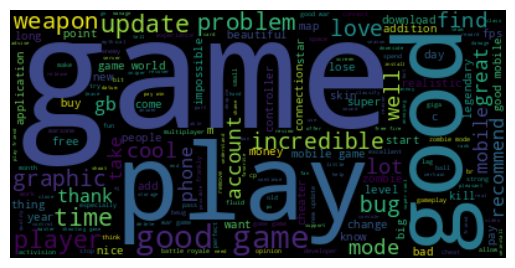

In [ ]:
text = " ".join(i for i in df_COD.clean_avis)
nuage = WordCloud().generate(text)
plt.imshow(nuage, interpolation="bilinear")
plt.axis("off")
plt.show()

<h4> 1.5.3 MC5 <h4>

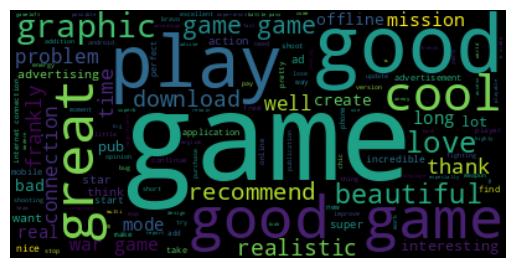

In [ ]:
text = " ".join(i for i in df_MC5.clean_avis)
nuage = WordCloud().generate(text)
plt.imshow(nuage, interpolation="bilinear")
plt.axis("off")
plt.show()

<h4> Interprétation <h4>

Les section 1.4 et 1.5 qui nous ont permis d'identifier et de visualiser les termes fréquemment utilisés dans les commentaires. Nous ennumérons les plus pertinents par application :

a) t5 : good, love, thank, beautiful, cool

b) bert : cool, love, well, good, incredible

c) MC5 : great, good, beautiful, love, cool, real, recommend, realistic, thank

De manière générale pour ces models, les utilisateurs ont utilisé des termes positifs pour exprimer la manière dont ils perçoivent le service qui leur est fourni. Ces utilisateurs mettent l'accent sur des aspects tels que :

* Le réalisme du jeu

* La force d'attraction et de captivation de ce jeu

* la joie que procure ce jeu
